# CI data analysis: derivative

In [1]:
# import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from math  import ceil
import matplotlib.gridspec as gridspec # for subplots
from utils import *
from scipy.signal import get_window
import math

# data preparation:
_dfs = load_data()

# countries to study:
countries = ['Ireland', 'Germany', 'Great Britain', 'France', 'Sweden', 'Finland', 'Belgium']
list_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'yellow']

# countries = ['Ireland', 'Germany', 'Great Britain']
# list_colors = ['red', 'green', 'blue']

## Plot of the derivative

Simple approximation: (y[i+1] - y[i])/1 hour

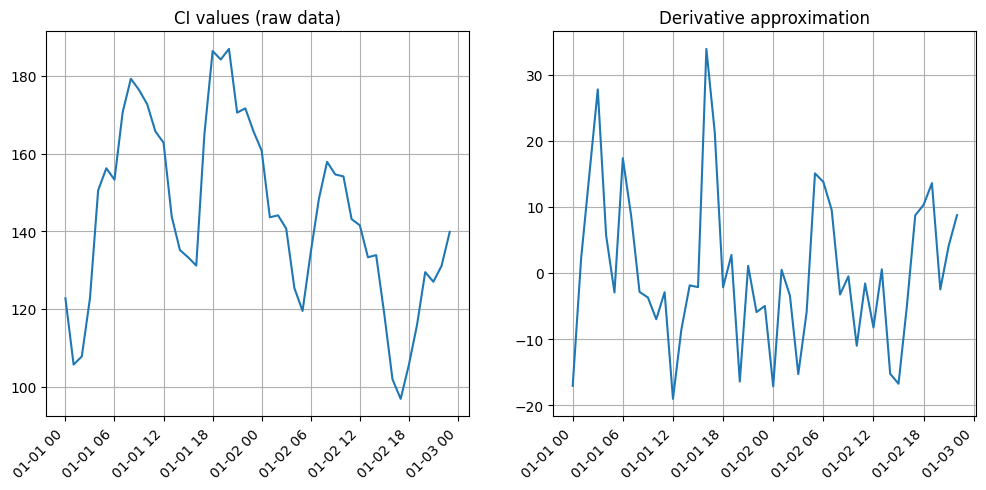

In [3]:
country = countries[0]

start_date = datetime(2022, 1, 1, 0, 0) # year, month, day, hour, min
# end_date = start_date + timedelta(hours=24*15)
end_date = datetime(2022, 1, 2, 23, 59) # year, month, day, hour, min

# Import Data
CI_values = get_CI_values(_dfs, country, start_date, end_date)
time_values =  get_datetime_values(_dfs, country, start_date, end_date)

diff_CI_values = CI_values[1:] - CI_values[:-1]

# plot:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(time_values, CI_values, label=country)
plt.title('CI values (raw data)')
plt.grid()
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels to diagonal
plt.subplot(1, 2, 2)
plt.plot(time_values[:-1], diff_CI_values, label=country)
plt.title('Derivative approximation')
plt.grid()
plt.xticks(rotation=45, ha='right')  # rotate x-axis labels to diagonal
plt.show()